In [101]:
from PIL import Image
import cv2
import numpy as np
from PIL.ImageOps import grayscale
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
import mahotas
from scipy.stats import circmean, circstd

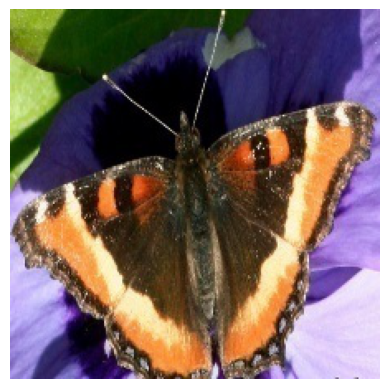

In [49]:
image = Image.open("data/train/Image_1200.jpg")
plt.imshow(image)
plt.axis("off")
None

In [50]:
df = pd.read_csv("./data/Training_set.csv")
file_names = df.iloc[:, 0].tolist()

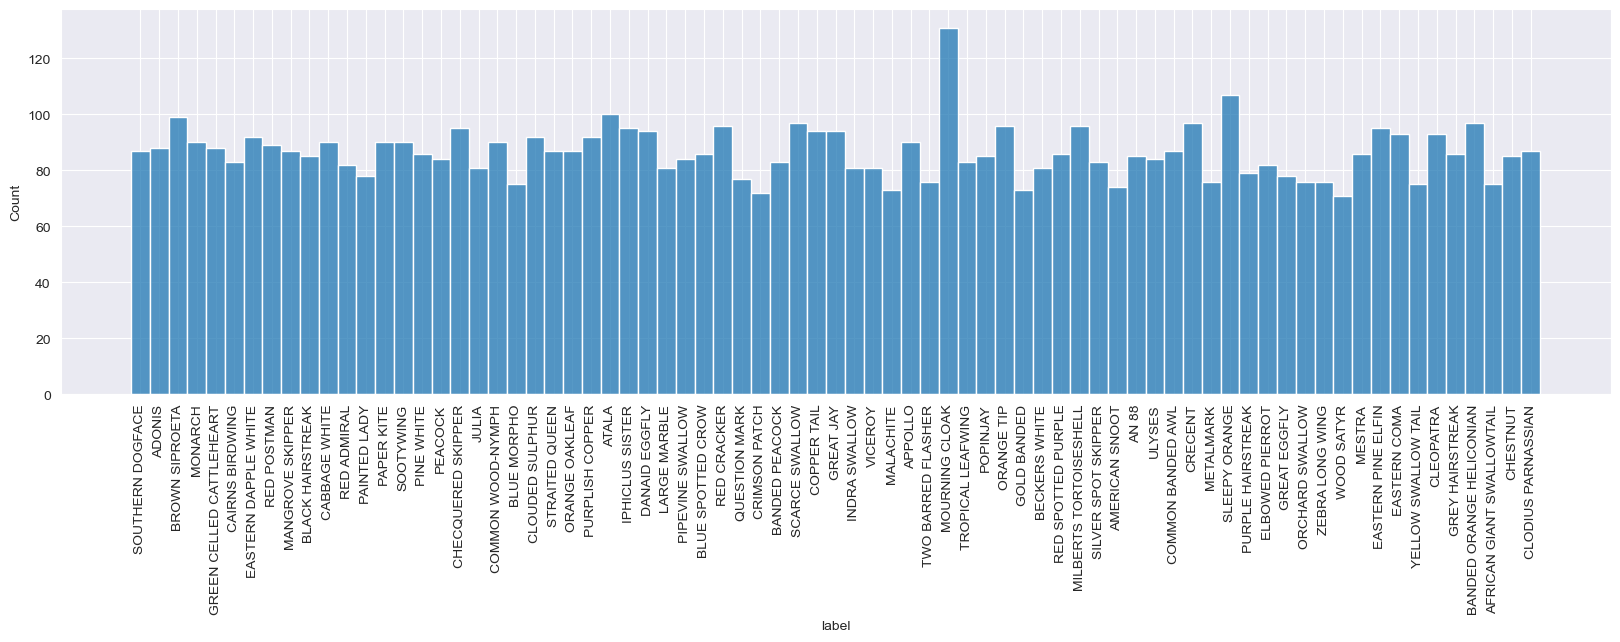

In [51]:
plt.figure(figsize=(20, 5))
sns.histplot(df['label'])
plt.xticks(rotation=90)
plt.show()

In [52]:
df['label'].value_counts()

label
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
SCARCE SWALLOW     97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: count, Length: 75, dtype: int64

In [53]:
heights = []
widths = []
for file_name in file_names:
    try:
        with Image.open(f"data/train/{file_name}") as img:
            width, height = img.size
            heights.append(height)
            widths.append(width)
    except FileNotFoundError:
        heights.append(None)
        widths.append(None)
        print(file_name + " is not available")
        continue

In [54]:
df['height'] = heights
df['width'] = widths

Text(0, 0.5, 'Count')

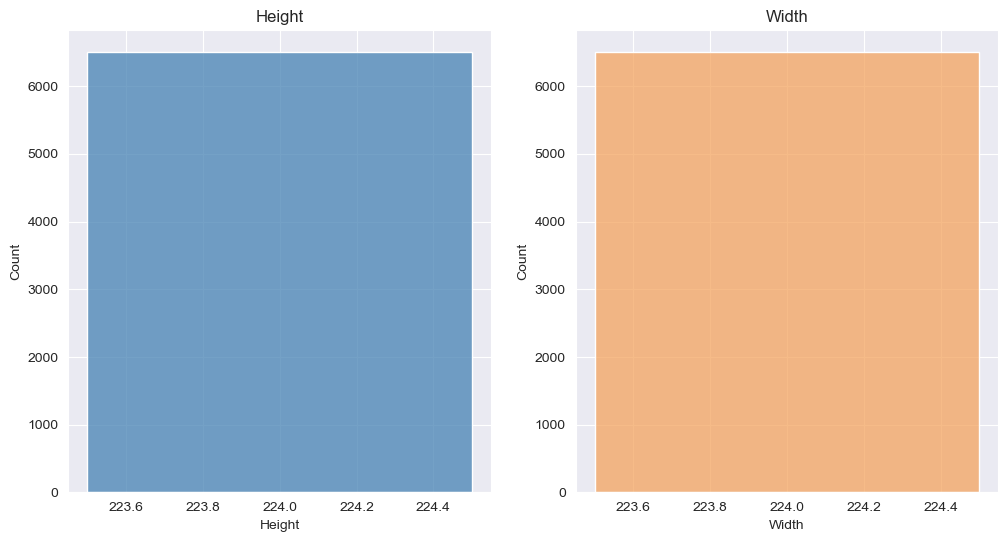

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='height', color='steelblue', ax=axes[0])
axes[0].set_title('Height')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

sns.histplot(data=df, x='width', color='sandybrown', ax=axes[1])
axes[1].set_title('Width')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Count')


## Wszystkie obrazy mają wymiary 224x224

In [56]:
imgs = []

for file_name in file_names:
    try:
        imgs.append(np.array(Image.open(f"data/train/{file_name}")))
    except:
        print(file_name + " is not available")
        continue

In [57]:
blues = []
greens = []
reds = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0], img[:, : ,1], img[:, :, 2]
    blues.append(b_channel)
    greens.append(g_channel)
    reds.append(r_channel)

In [58]:
greens2 = np.stack(greens, axis=-1)
blues2 = np.stack(blues, axis=-1)
reds2 = np.stack(reds, axis=-1)

In [59]:
blues2.shape

(224, 224, 6499)

In [60]:
img.shape

(224, 224, 3)

In [61]:
var_per_pixel_green = greens2.var(axis=-1)
var_per_pixel_blue = blues2.var(axis=-1)
var_per_pixel_red = reds2.var(axis=2)

## Wariancja pikselów dla danego koloru

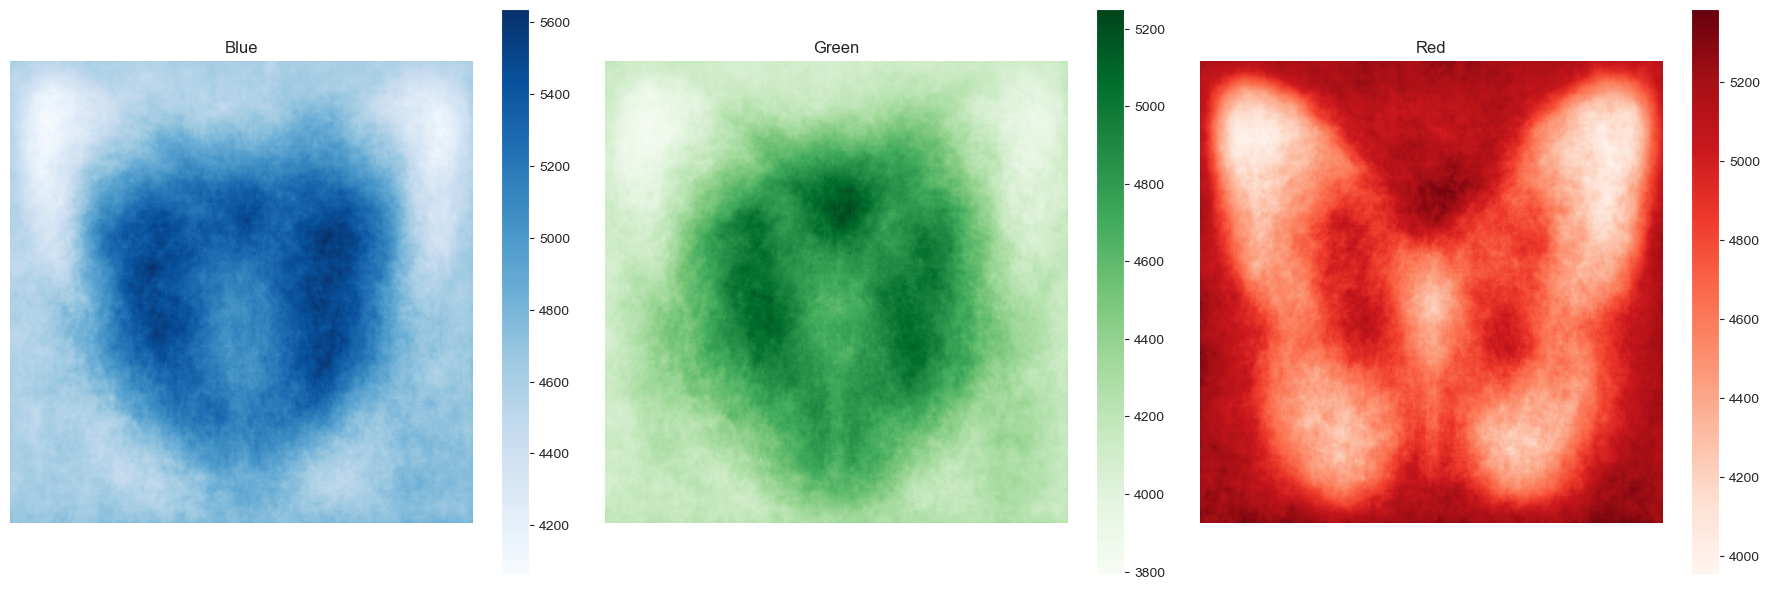

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(var_per_pixel_blue, aspect='equal', cmap=plt.cm.Blues)
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(var_per_pixel_green, aspect='equal', cmap=plt.cm.Greens)
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(var_per_pixel_red, aspect='equal', cmap=plt.cm.Reds)
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()

## Średnie natęzenie pikselów dla danego koloru

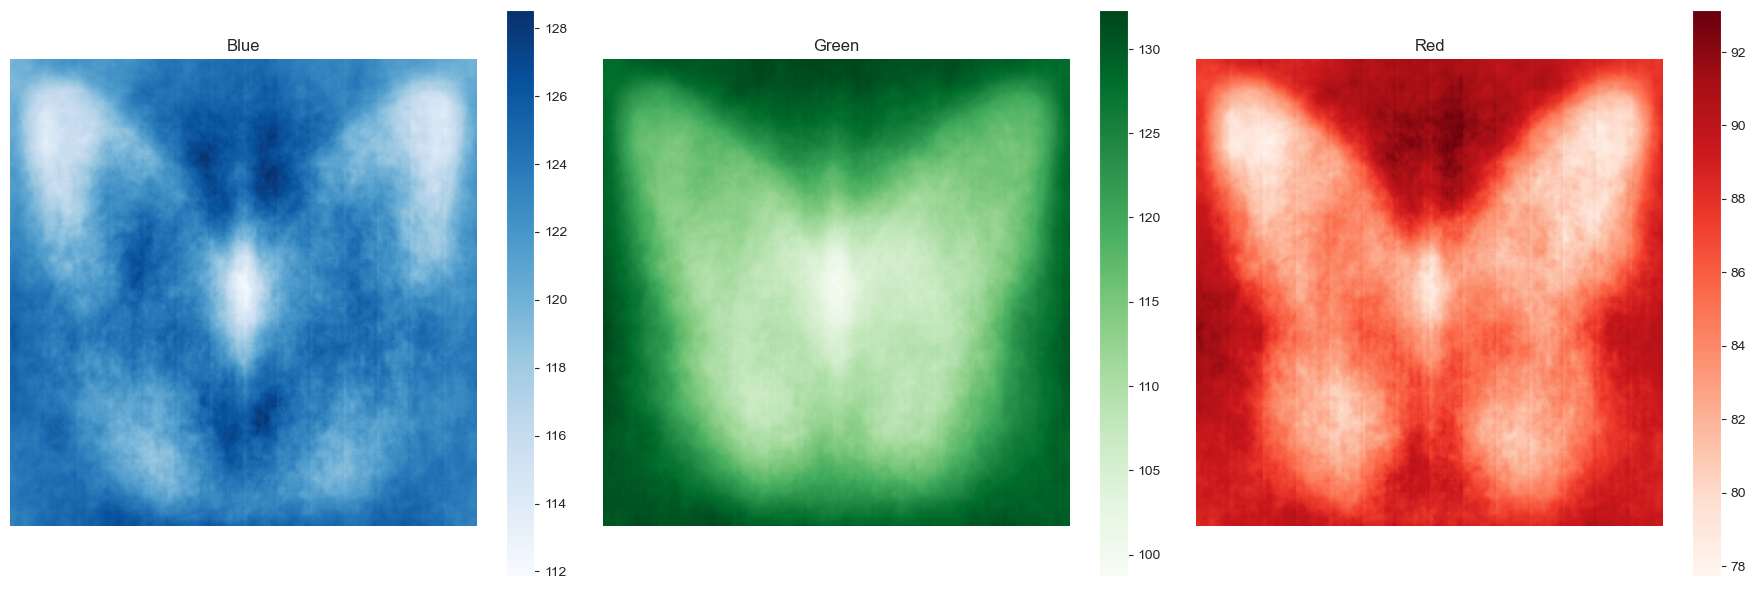

In [63]:
mean_per_pixel_blue = np.mean(blues2, axis=-1)
mean_per_pixel_green = np.mean(greens2, axis=-1)
mean_per_pixel_red = np.mean(reds2, axis=-1)

fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(mean_per_pixel_blue, aspect='equal', cmap=plt.cm.Blues)
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(mean_per_pixel_green, aspect='equal', cmap=plt.cm.Greens)
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(mean_per_pixel_red, aspect='equal', cmap=plt.cm.Reds)
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()

In [64]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0], img[:, : ,1], img[:, :, 2]
    blues_mean.append(b_channel.mean())
    greens_mean.append(g_channel.mean())
    reds_mean.append(r_channel.mean())

df['blue_mean'] = blues_mean
df['green_mean'] = greens_mean
df['red_mean'] = reds_mean

## Średnie natężenia danych kolorów
### Boxploty średnich natężeń

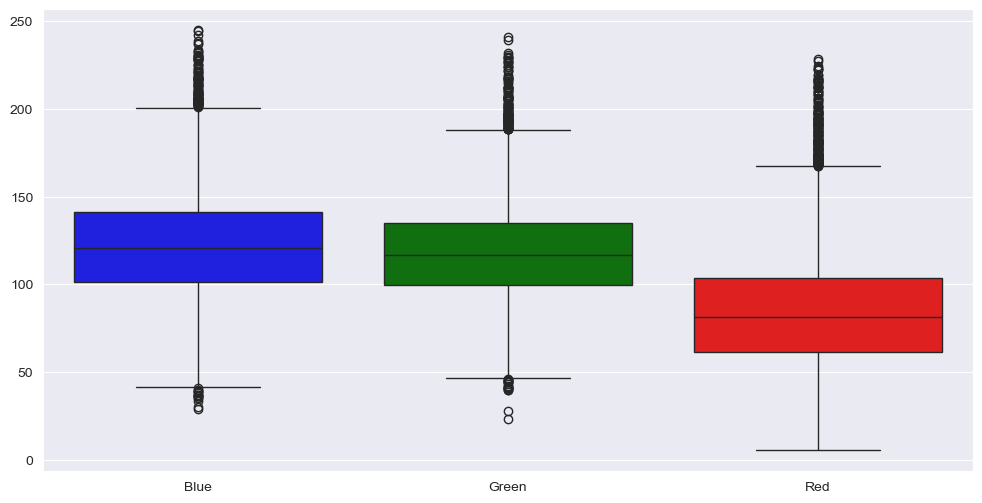

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['blue_mean', 'green_mean', 'red_mean']], palette=['blue','green','red'])
plt.xticks([0,1,2], ['Blue', 'Green', 'Red'])
plt.show()

### Histogramy średnich natężeń

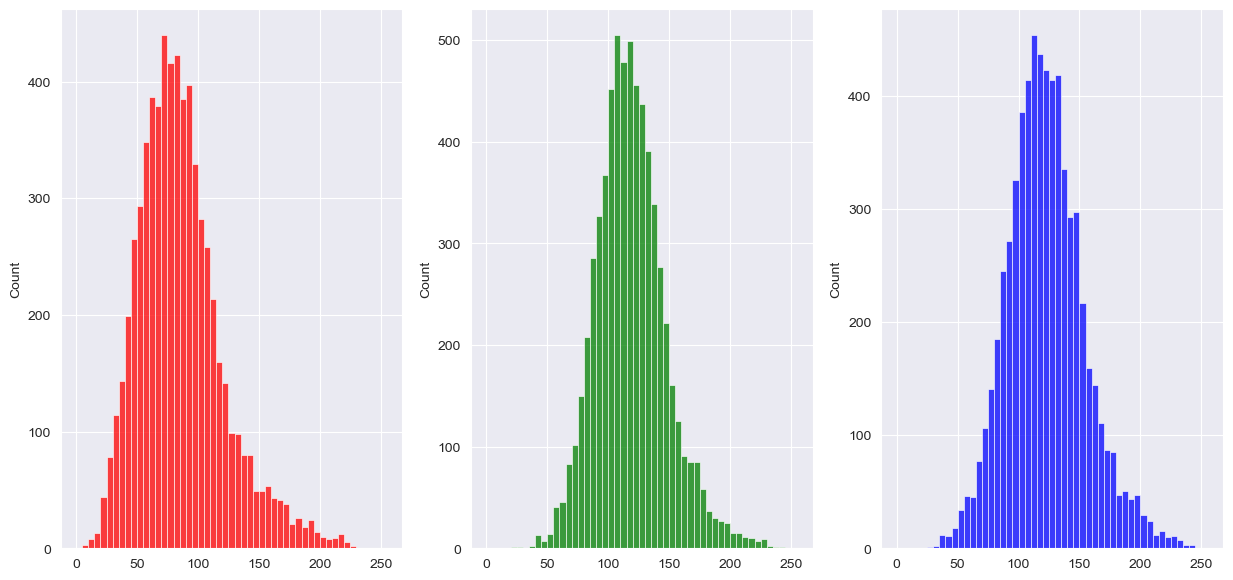

In [66]:
plt.figure(figsize=(15, 7))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 3)
sns.histplot(blues_mean, color="blue", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(greens_mean, color="green", bins=bins)

plt.subplot(1, 3, 1)
sns.histplot(reds_mean, color="red", bins=bins)

None

<Axes: ylabel='Count'>

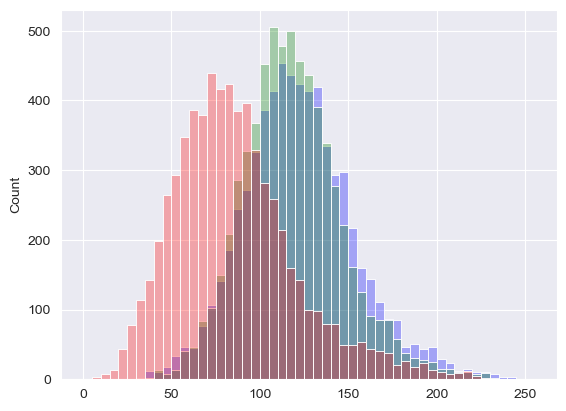

In [67]:
sns.histplot(blues_mean, color="blue", bins=bins, alpha=0.3)
sns.histplot(greens_mean, color="green", bins=bins, alpha=0.3)
sns.histplot(reds_mean, color="red", bins=bins, alpha=0.3)

In [68]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0].mean(axis=1).ravel(), img[:, : ,1].mean(axis=1).ravel(), img[:, :, 2].mean(axis=1).ravel()
    blues_mean.append(b_channel)
    greens_mean.append(g_channel)
    reds_mean.append(r_channel)

In [69]:
blue = np.array(blues_mean).ravel()
red = np.array(reds_mean).ravel()
green = np.array(greens_mean).ravel()

In [70]:
x = np.histogram(blue, bins=bins)

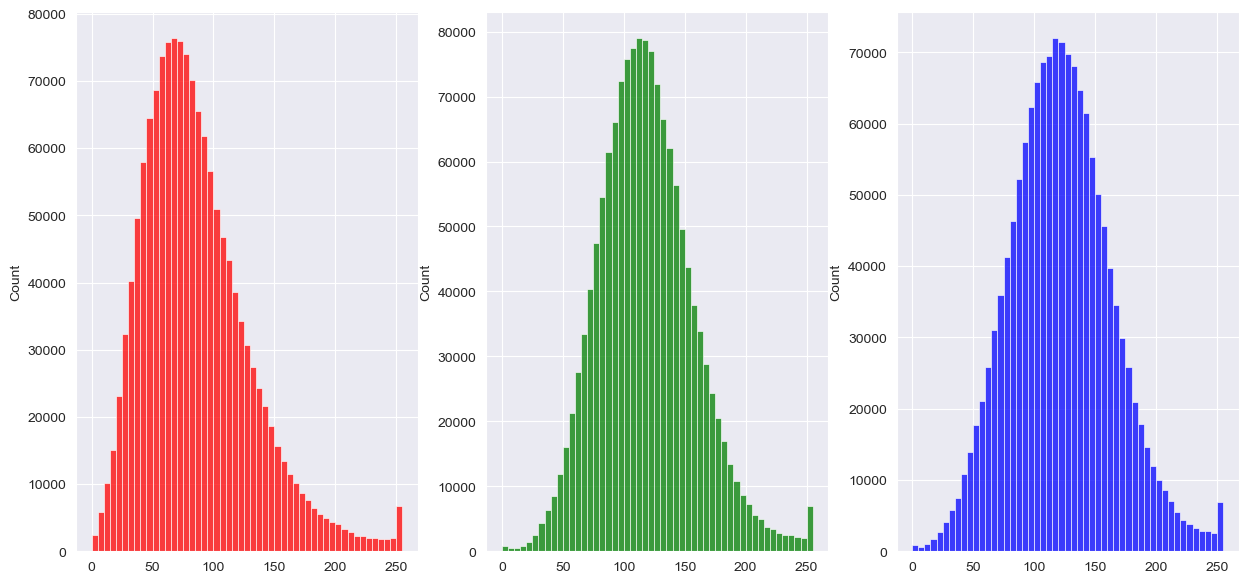

In [71]:
plt.figure(figsize=(15, 7))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 3)
sns.histplot(blue, color="blue", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(green, color="green", bins=bins)

plt.subplot(1, 3, 1)
sns.histplot(red, color="red", bins=bins)

None

<Axes: ylabel='Count'>

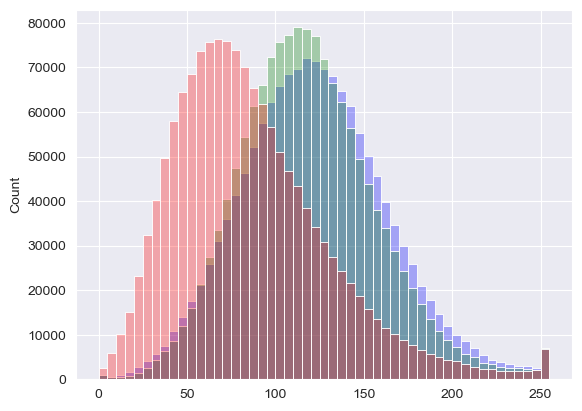

In [72]:
sns.histplot(blue, color="blue", bins=bins, alpha=0.3)
sns.histplot(green, color="green", bins=bins, alpha=0.3)
sns.histplot(red, color="red", bins=bins, alpha=0.3)

In [73]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0].mean(axis=0).ravel(), img[:, : ,1].mean(axis=0).ravel(), img[:, :, 2].mean(axis=0).ravel()
    blues_mean.append(b_channel)
    greens_mean.append(g_channel)
    reds_mean.append(r_channel)

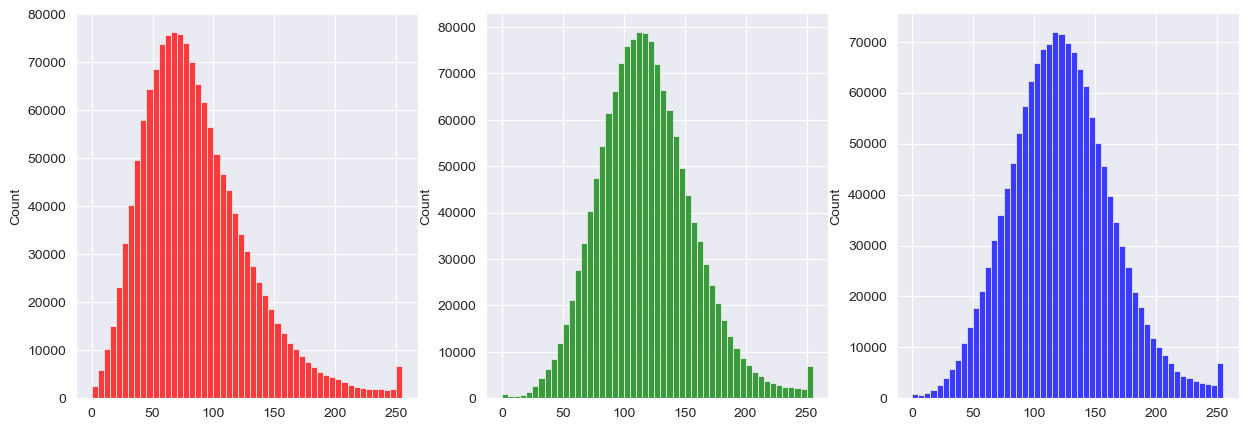

In [74]:
plt.figure(figsize=(15, 5))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 3)
sns.histplot(blue, color="blue", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(green, color="green", bins=bins)

plt.subplot(1, 3, 1)
sns.histplot(red, color="red", bins=bins)

None

<Axes: ylabel='Count'>

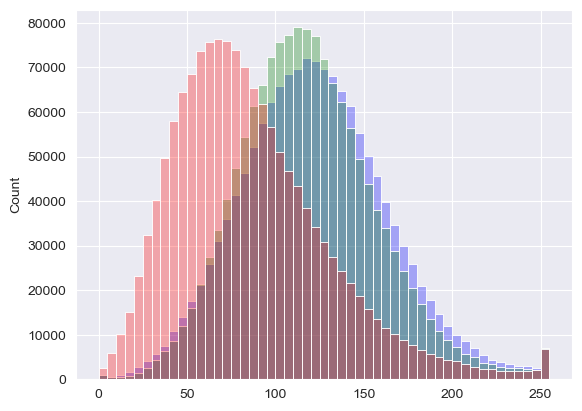

In [75]:
sns.histplot(blue, color="blue", bins=bins, alpha=0.3)
sns.histplot(green, color="green", bins=bins, alpha=0.3)
sns.histplot(red, color="red", bins=bins, alpha=0.3)

# Milestone 2 - feature engineering

# Haralick featrures

ASM (Angular Second Moment) – Mówi, jak bardzo obraz jest „gładki”. Gdy większość pikseli ma ten sam odcień szarości, energia jest wysoka. \
Contrast – Określa, jak mocno sąsiadujące piksele różnią się jasnością. Im większe skoki jasno–ciemno, tym wyższy kontrast. \
Correlation – Sprawdza, czy jasność jednego piksela daje się przewidzieć na podstawie jasności sąsiada. Wysoka korelacja = piksele zmieniają się podobnie. \
Sum of Squares: Variance – To po prostu wariancja poziomów szarości – mierzy, jak szeroko „rozlane” są odcienie wokół średniej jasności. \
Homogeneity – Mierzy, jak „jednorodny” jest obraz: wysokie wartości oznaczają, że sąsiednie piksele mają podobny odcień. \
Sum Average – Średnia z sum poziomów szarości par pikseli. W praktyce – przeciętny „zsumowany” odcień dwójki sąsiadów. \
Sum Variance – Wariancja tych właśnie sum – mówi, jak te sumy się rozpraszają. \
Sum Entropy – Entropia, czyli nieuporządkowanie w rozkładzie sum. Duża wartość = szeroka, chaotyczna rozpiętość tych sum. \
Entropy – Ogólna losowość całego obrazu. Tekstury pełne drobnych, nieprzewidywalnych szczegółów mają wysoką entropię. \
Difference Variance – Wariancja różnic jasności między sąsiadami. Wysoka, gdy te różnice są bardzo zróżnicowane. \
Difference Entropy – Entropia (chaotyczność) rozkładu tych różnic. \
Information Measure of Correlation 1 – Porównuje wspólną entropię pikseli z entropią pojedynczych pikseli. Wartość rośnie, gdy piksele niosą dużo „wzajemnej informacji”. \
Information Measure of Correlation 2 – Zmieniona (znormalizowana) wersja poprzedniego wskaźnika – jeszcze mocniej podkreśla podobieństwo struktur w obrazie.

In [76]:
grayscale_imgs = []

for img in imgs:
    grayscale_imgs.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))


In [77]:
features = []
for img in grayscale_imgs:
    feature = mahotas.features.haralick(img, return_mean=True)
    features.append(feature)


In [78]:
df_features = pd.DataFrame(features, columns=["ASM", "contrast", "correlation", "variance", "homogeneity", "sum_average", "sum_variance", "sum_entropy", "entropy", "diff_variance", "diff_entropy", "IMC1", "IMC2",])

In [79]:
df = pd.concat([df, df_features], axis=1)

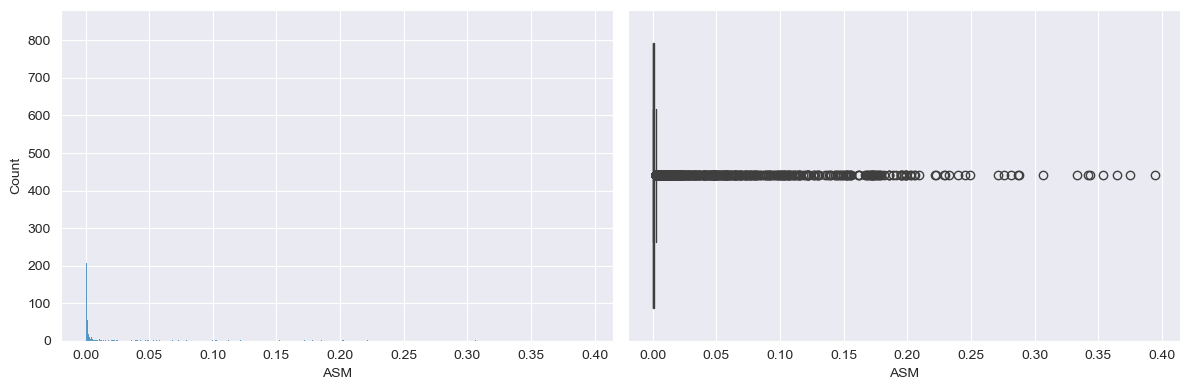

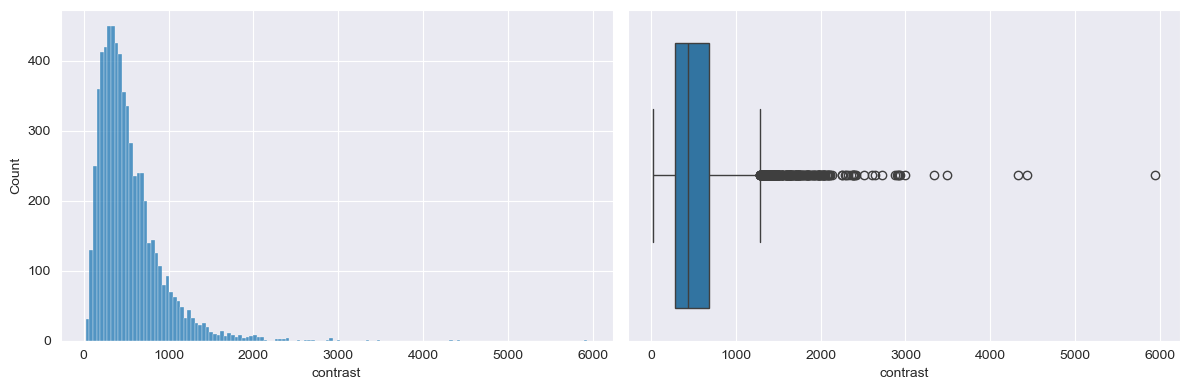

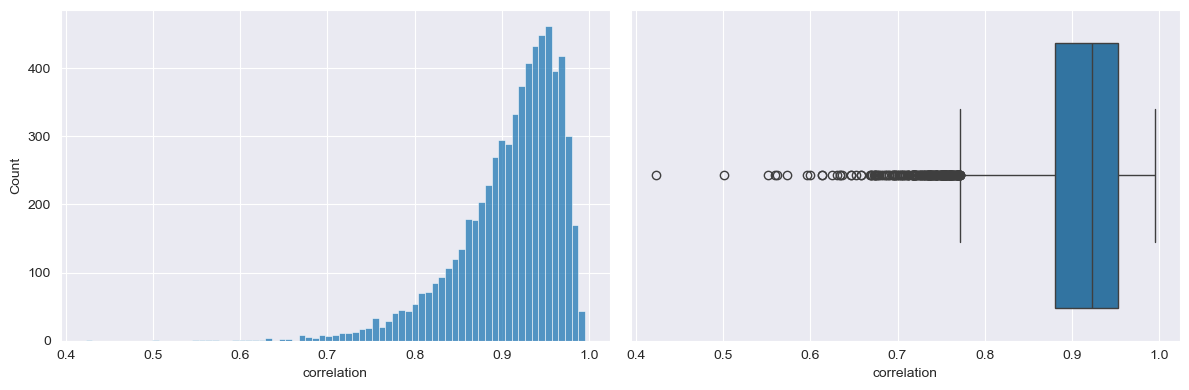

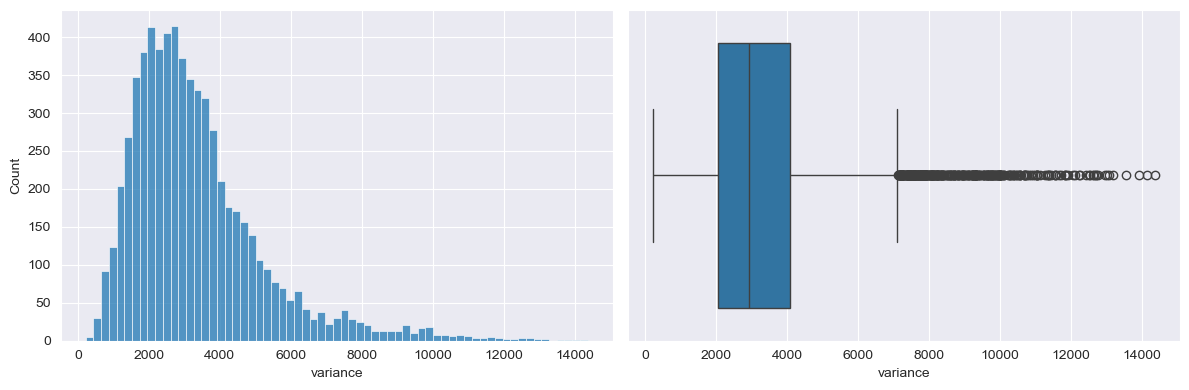

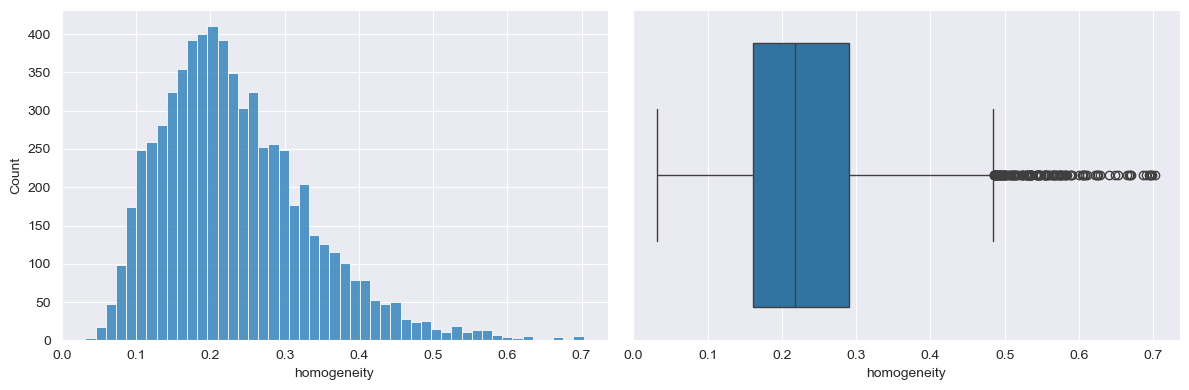

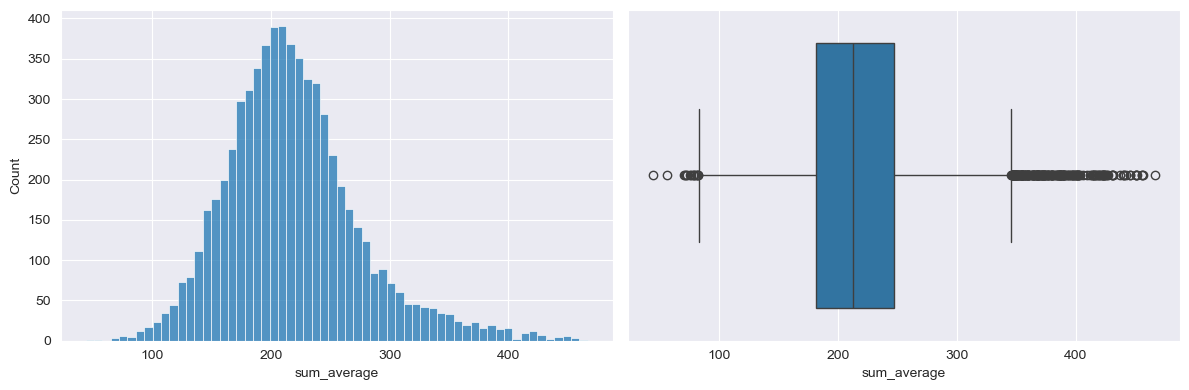

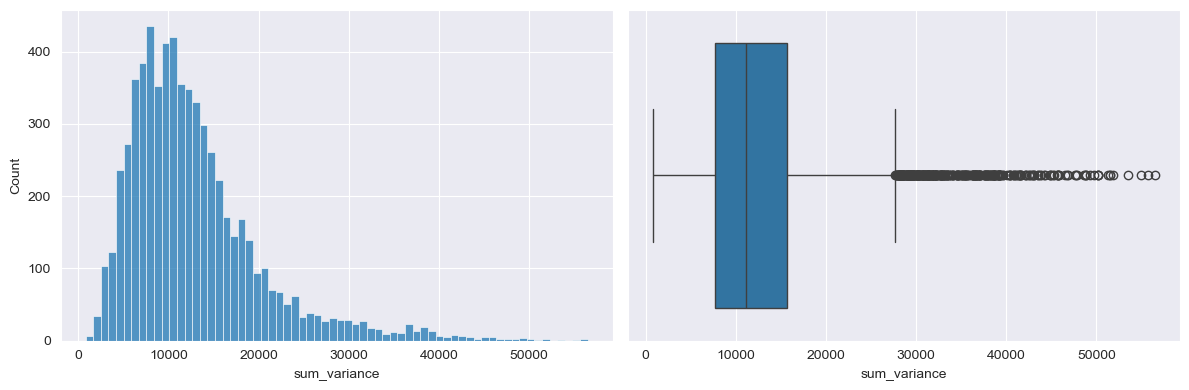

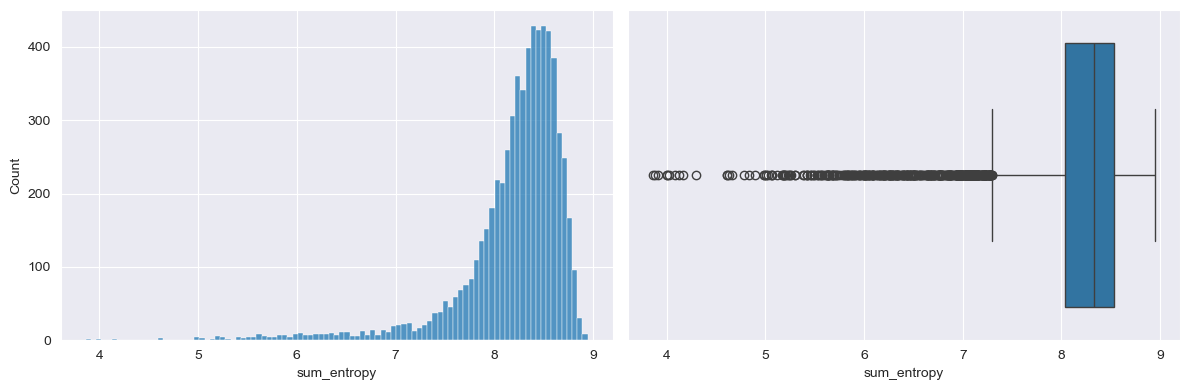

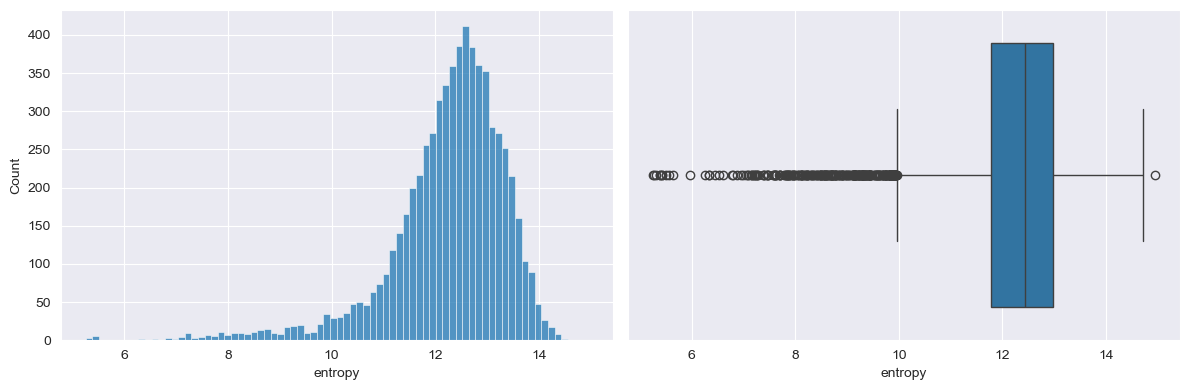

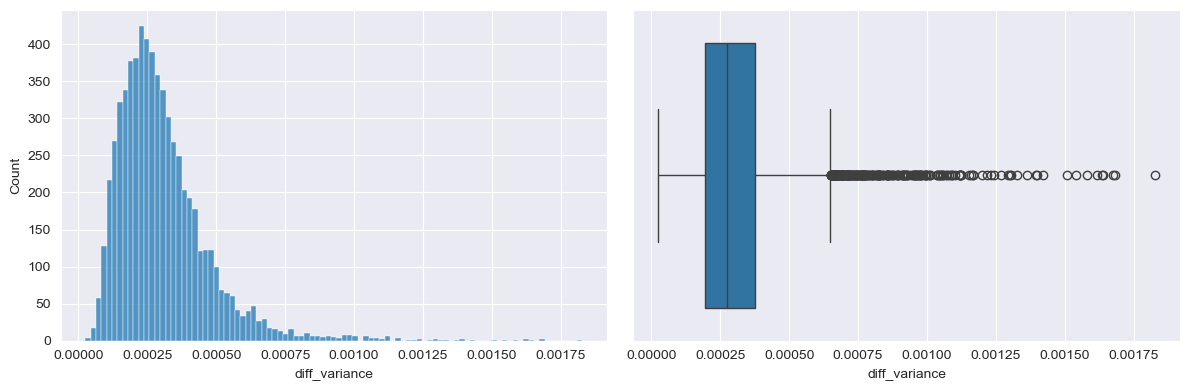

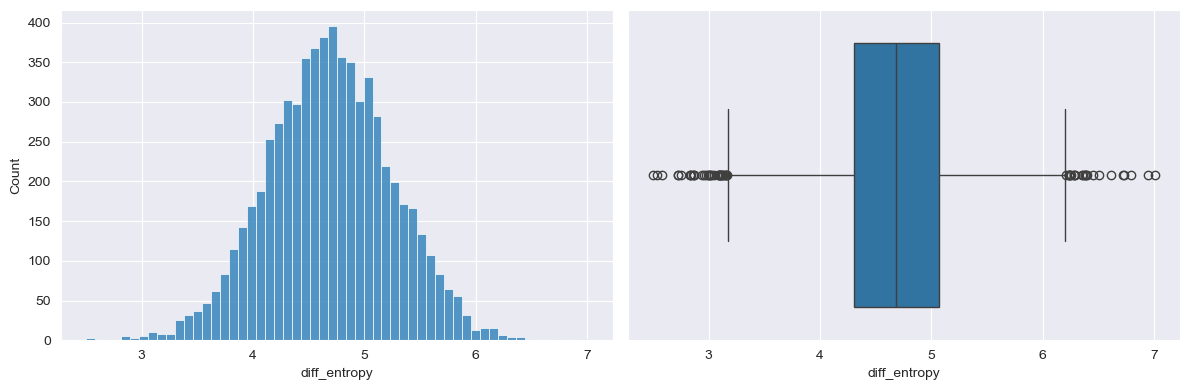

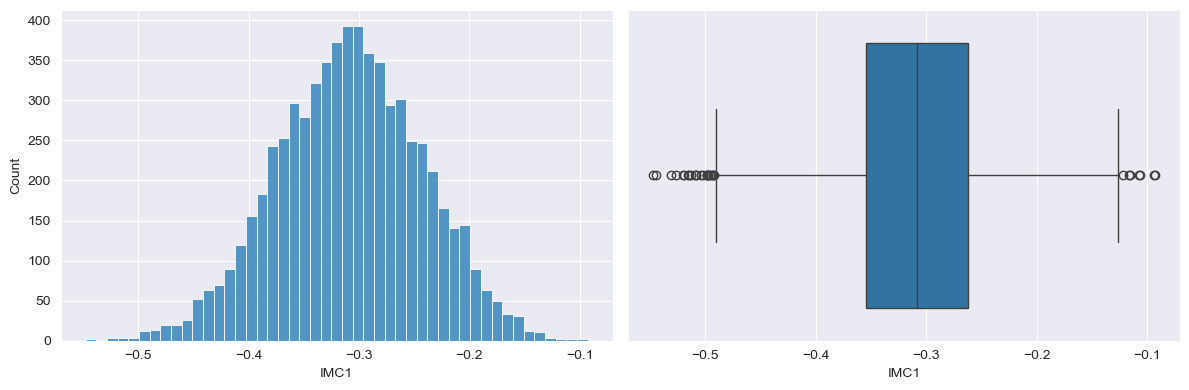

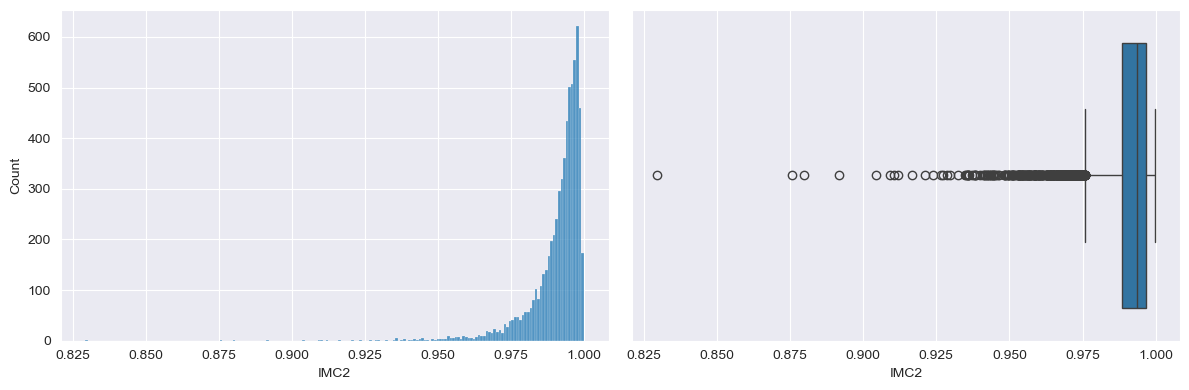

In [80]:
for feature in df_features.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data=df, x=feature, ax=axes[0])
    sns.boxplot(data=df, x=feature, ax=axes[1])
    plt.tight_layout()
    plt.show()

In [81]:
imgs = []

for file_name in file_names:
    try:
        imgs.append(np.array(cv2.imread(f"data/train/{file_name}")))
    except:
        print(file_name + " is not available")
        continue

RGB \
    R: Red \
    G: Green \
    B: Blue \
HSV \
    H: Hue \
    S: Saturation \
    V: Value \
Lab \
    L: Lightness \
    a: Green–Red opponent channel \
    b: Blue–Yellow opponent channel

In [82]:
imgs_rgb = []
for img in imgs:
    imgs_rgb.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

imgs_hsv = []
for img in imgs:
    imgs_hsv.append(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

imgs_lab = []
for img in imgs:
    imgs_lab.append(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))

In [83]:
r_mean = []
g_mean = []
b_mean = []
for img in imgs_rgb:
    r_mean.append(np.mean(img[:, :, 0]))
    g_mean.append(np.mean(img[:, :, 1]))
    b_mean.append(np.mean(img[:, :, 2]))

In [114]:
df["r_mean"] = r_mean
df["g_mean"] = g_mean
df["b_mean"] = b_mean

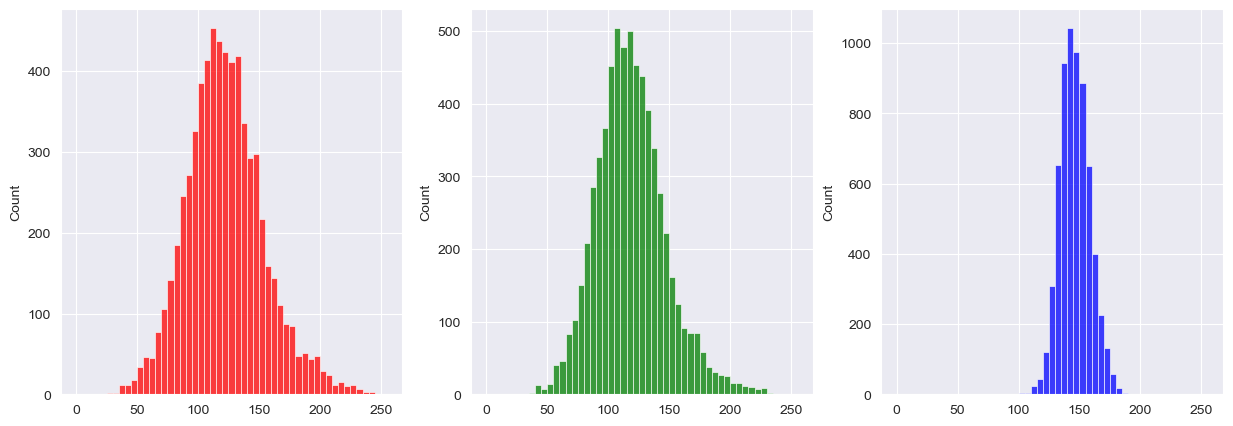

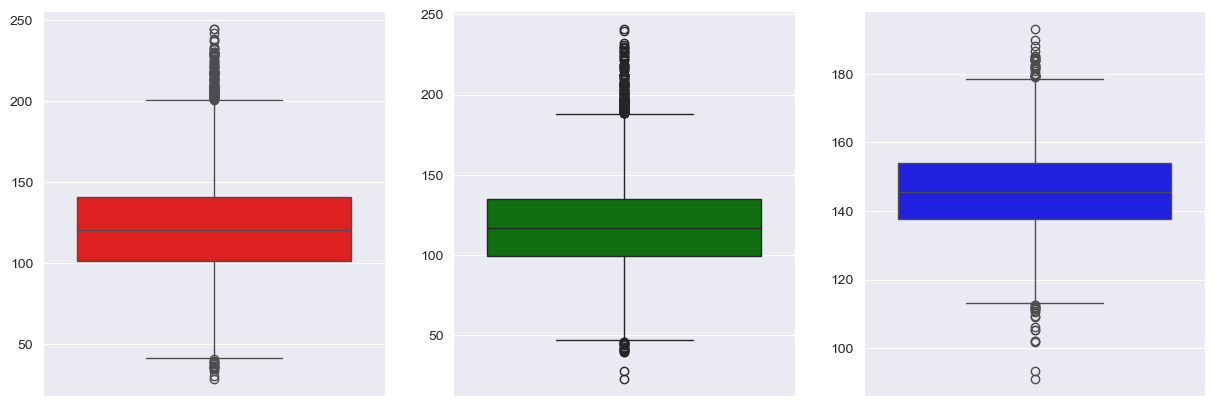

In [95]:
plt.figure(figsize=(15, 5))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.histplot(r_mean, color="red", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(g_mean, color="green", bins=bins)

plt.subplot(1, 3, 3)
sns.histplot(b_mean, color="blue", bins=bins)

plt.figure(figsize=(15, 5))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.boxplot(r_mean, color="red")

plt.subplot(1, 3, 2)
sns.boxplot(g_mean, color="green")

plt.subplot(1, 3, 3)
sns.boxplot(b_mean, color="blue")
None

In [84]:
r_std = []
g_std = []
b_std = []
for img in imgs_rgb:
    r_std.append(np.std(img[:, :, 0]))
    g_std.append(np.std(img[:, :, 1]))
    b_std.append(np.std(img[:, :, 2]))

In [113]:
df["r_std"] = r_std
df["g_std"] = g_std
df["b_std"] = b_std

<Axes: >

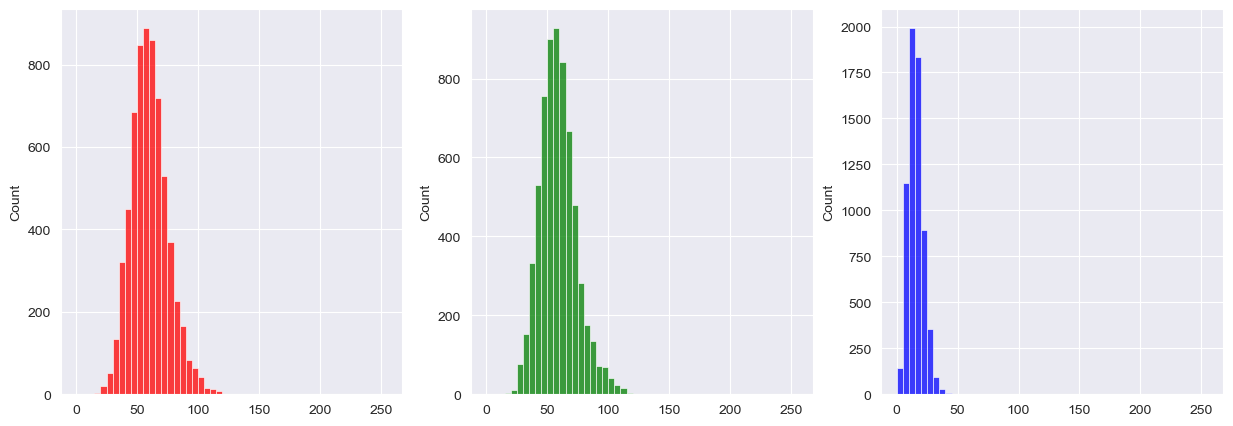

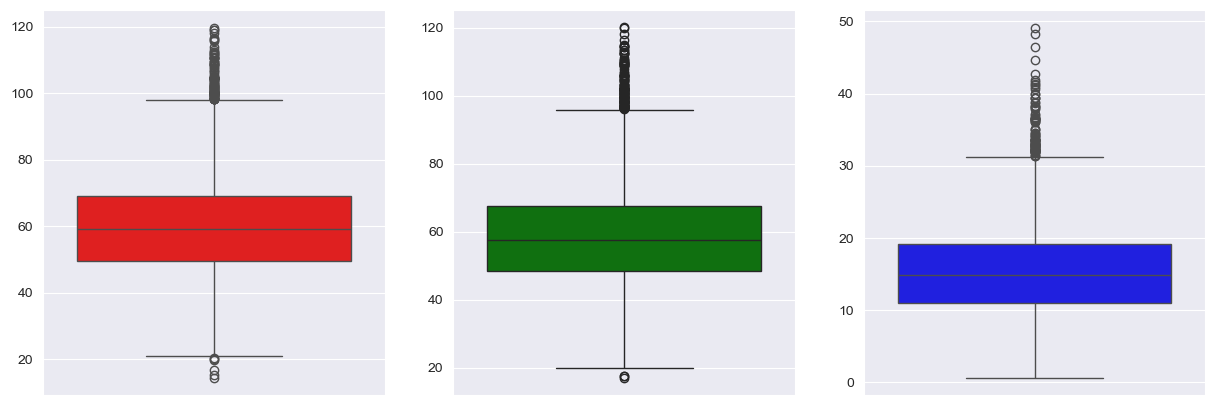

In [96]:
plt.figure(figsize=(15, 5))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.histplot(r_std, color="red", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(g_std, color="green", bins=bins)

plt.subplot(1, 3, 3)
sns.histplot(b_std, color="blue", bins=bins)

plt.figure(figsize=(15, 5))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.boxplot(r_std, color="red")

plt.subplot(1, 3, 2)
sns.boxplot(g_std, color="green")

plt.subplot(1, 3, 3)
sns.boxplot(b_std, color="blue")

In [102]:
h_mean = []
s_mean = []
v_mean = []
for img in imgs_hsv:
    h_mean.append(circmean(img[:, :, 0], high=180, low=0))
    s_mean.append(np.mean(img[:, :, 1]))
    v_mean.append(np.mean(img[:, :, 2]))

In [112]:
df["h_mean"] = h_mean
df["s_mean"] = s_mean
df["v_mean"] = v_mean

Text(0.5, 1.0, 'Value')

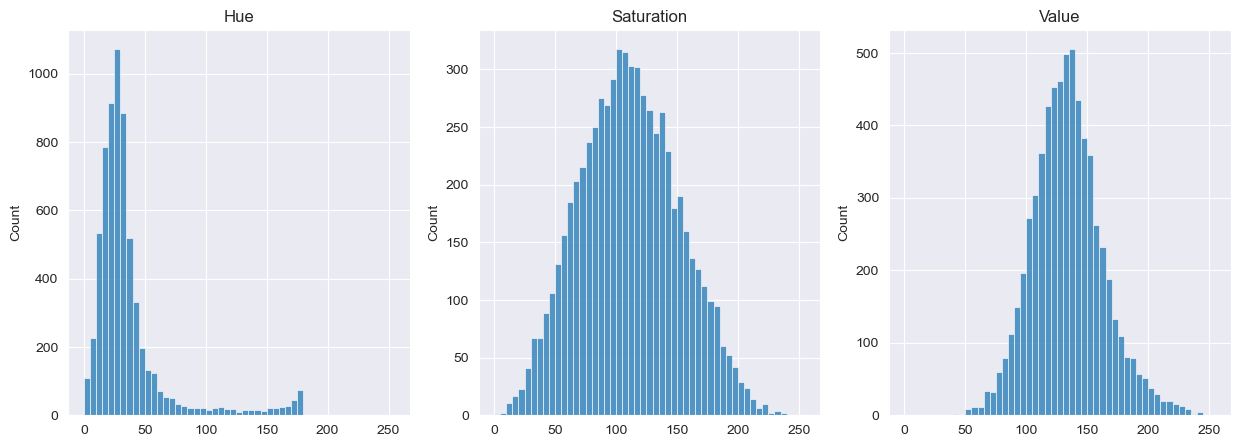

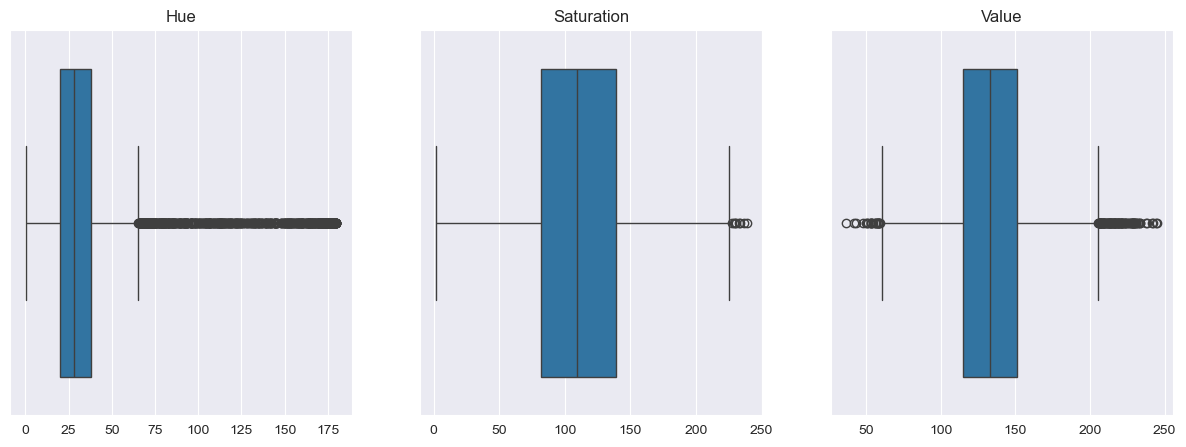

In [105]:
plt.figure(figsize=(15, 5))
bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.histplot(h_mean, bins=bins)
plt.title("Hue")

plt.subplot(1, 3, 2)
sns.histplot(s_mean, bins=bins)
plt.title("Saturation")

plt.subplot(1, 3, 3)
sns.histplot(v_mean, bins=bins)
plt.title("Value")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=h_mean)
plt.title("Hue")

plt.subplot(1, 3, 2)
sns.boxplot(x=s_mean)
plt.title("Saturation")

plt.subplot(1, 3, 3)
sns.boxplot(x=v_mean)
plt.title("Value")

In [103]:
h_std = []
s_std = []
v_std = []
for img in imgs_hsv:
    h_std.append(circstd(img[:, :, 0], high=180, low=0))
    s_std.append(np.std(img[:, :, 1]))
    v_std.append(np.std(img[:, :, 2]))

In [109]:
df["h_std"] = h_std
df["s_std"] = s_std
df["v_std"] = v_std

Text(0.5, 1.0, 'Value')

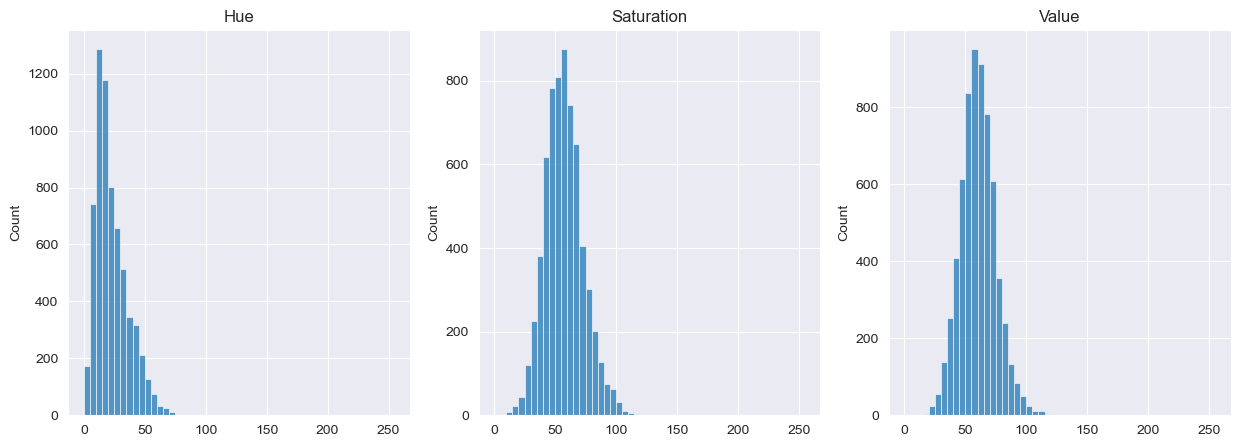

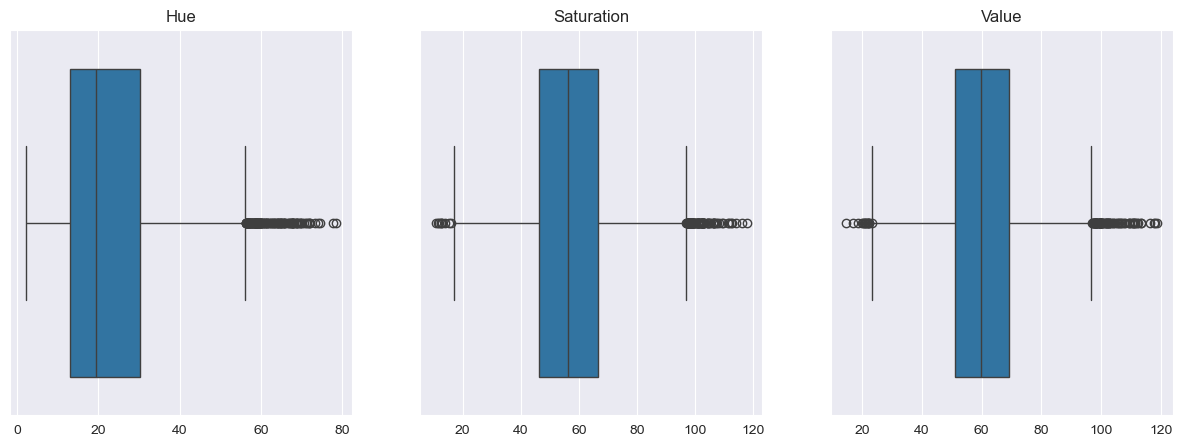

In [106]:
plt.figure(figsize=(15, 5))
bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.histplot(h_std, bins=bins)
plt.title("Hue")

plt.subplot(1, 3, 2)
sns.histplot(s_std, bins=bins)
plt.title("Saturation")

plt.subplot(1, 3, 3)
sns.histplot(v_std, bins=bins)
plt.title("Value")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=h_std)
plt.title("Hue")

plt.subplot(1, 3, 2)
sns.boxplot(x=s_std)
plt.title("Saturation")

plt.subplot(1, 3, 3)
sns.boxplot(x=v_std)
plt.title("Value")

In [87]:
l_mean = []
a_mean = []
b_mean = []
for img in imgs_lab:
    l_mean.append(np.mean(img[:, :, 0]))
    a_mean.append(np.mean(img[:, :, 1]))
    b_mean.append(np.mean(img[:, :, 2]))

In [110]:
df["l_mean"] = l_mean
df["a_mean"] = a_mean
df["b_mean"] = b_mean

Text(0.5, 1.0, 'b')

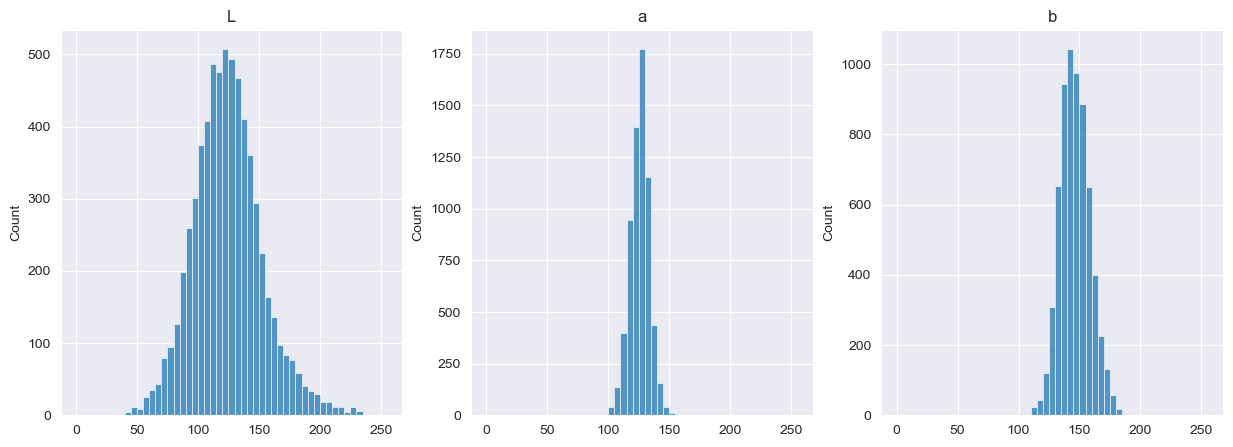

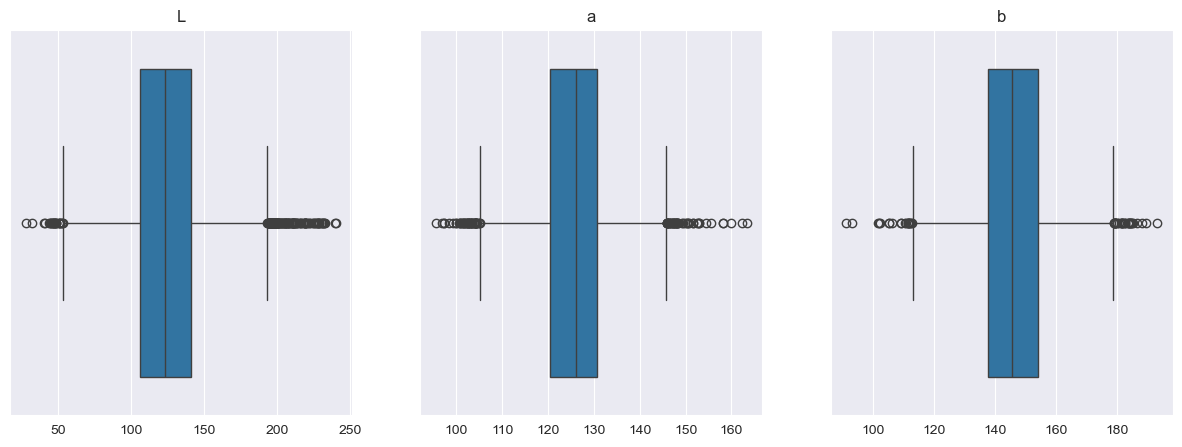

In [107]:
plt.figure(figsize=(15, 5))
bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.histplot(l_mean, bins=bins)
plt.title("L")

plt.subplot(1, 3, 2)
sns.histplot(a_mean, bins=bins)
plt.title("a")

plt.subplot(1, 3, 3)
sns.histplot(b_mean, bins=bins)
plt.title("b")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=l_mean)
plt.title("L")

plt.subplot(1, 3, 2)
sns.boxplot(x=a_mean)
plt.title("a")

plt.subplot(1, 3, 3)
sns.boxplot(x=b_mean)
plt.title("b")

In [88]:
l_std = []
a_std = []
b_std = []
for img in imgs_lab:
    l_std.append(np.std(img[:, :, 0]))
    a_std.append(np.std(img[:, :, 1]))
    b_std.append(np.std(img[:, :, 2]))

In [111]:
df["l_std"] = l_std
df["a_std"] = a_std
df["b_std"] = b_std

Text(0.5, 1.0, 'b')

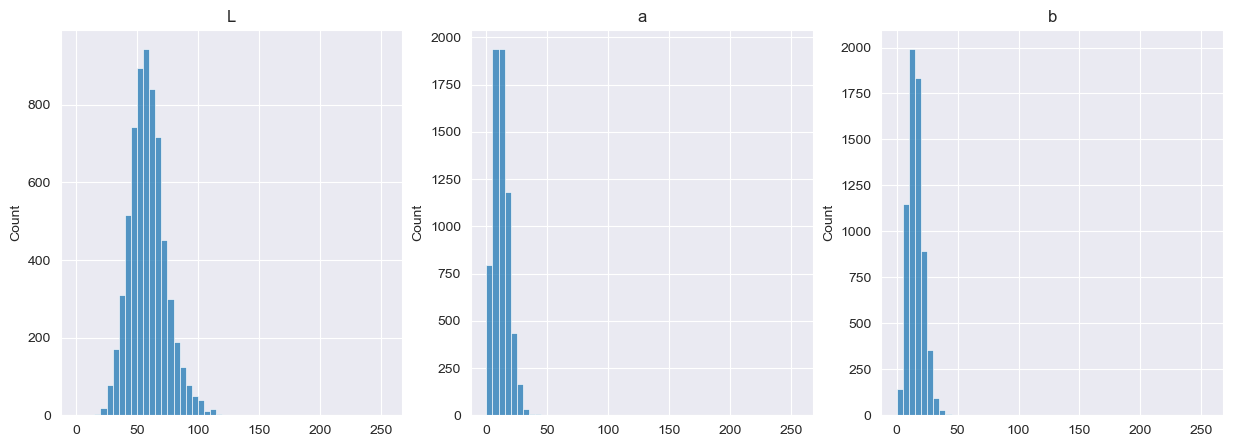

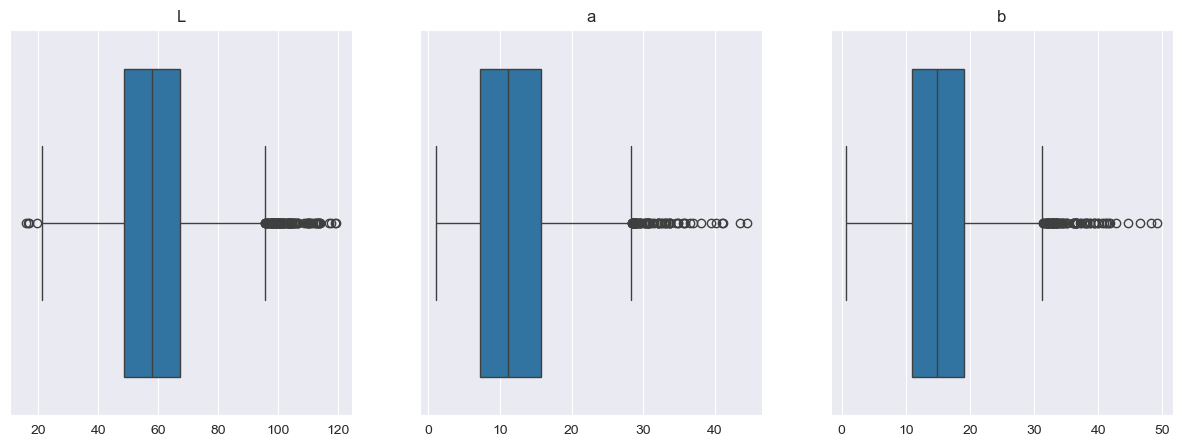

In [108]:
plt.figure(figsize=(15, 5))
bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 1)
sns.histplot(l_std, bins=bins)
plt.title("L")

plt.subplot(1, 3, 2)
sns.histplot(a_std, bins=bins)
plt.title("a")

plt.subplot(1, 3, 3)
sns.histplot(b_std, bins=bins)
plt.title("b")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=l_std)
plt.title("L")

plt.subplot(1, 3, 2)
sns.boxplot(x=a_std)
plt.title("a")

plt.subplot(1, 3, 3)
sns.boxplot(x=b_std)
plt.title("b")

In [125]:
hists_rgb = []
for img in imgs_rgb:
    hist = []
    for i in range(3):
        channel_hist = cv2.calcHist([img], [i], None, [8], [0, 256])
        hist.extend(cv2.normalize(channel_hist, channel_hist).flatten())
    hists_rgb.append(np.array(hist))

In [130]:
hists_rgb = pd.DataFrame(np.array(hists_rgb), columns=["r1", "r2", "r3", "r4", "r5", "r6", "r7", "r8", "g1", "g2", "g3", "g4", "g5", "g6", "g7", "g8", "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8"])
df = pd.concat([df, hists_rgb], axis=1)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle as pkl
from sklearn.decomposition import PCA

In [13]:
df = []

In [14]:
for filename in os.listdir("data/train/"):
    image = Image.open("data/train/"+filename)
    image = np.array(image)
    image = image.reshape([1, 224, 224, 3])
    df.append(image)

In [15]:
df = np.concat(df, axis=0)

In [21]:
with open("data/train_images.pkl", "wb") as file:
    pkl.dump(df, file)

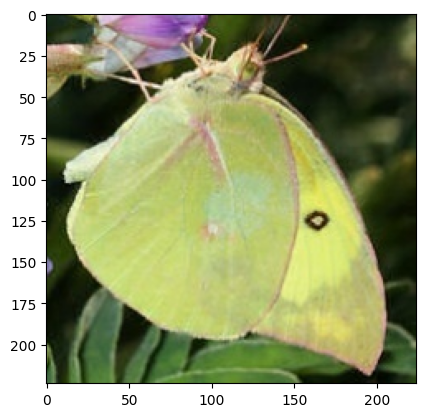

In [22]:
plt.imshow(df[0].reshape([224, 224, 3]))

In [23]:
model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False)

In [25]:
preprocessed = model.predict(df)

204/204 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step


In [27]:
with open("data/train_images_preprocessed.pkl", "wb") as file:
    pkl.dump(preprocessed, file)

In [26]:
df.shape

(6499, 224, 224, 3)

In [29]:
preprocessed.shape

(6499, 7, 7, 2048)

In [30]:
preprocessed = preprocessed.reshape([preprocessed.shape[0], -1])

In [31]:
pca = PCA(n_components=0.999)

In [32]:
x = pca.fit_transform(preprocessed)

In [33]:
with open("data/train_images_preprocessed_pca.pkl", "wb") as file:
    pkl.dump(x, file)

In [34]:
x.shape

(6499, 6402)

In [35]:
pca = PCA(n_components=0.95)
x = pca.fit_transform(preprocessed)

In [36]:
x.shape

(6499, 4553)

In [37]:
with open("data/train_images_preprocessed_pca_0,95.pkl", "wb") as file:
    pkl.dump(x, file)

# Obrabianie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle as pkl

In [2]:
x = []

In [3]:
for filename in os.listdir("data/train/"):
    x.append(filename)

In [4]:
y = []

In [5]:
for filename in os.listdir("data/train/"):
    y.append(filename)

In [7]:
x == y

True

In [137]:
labels = pd.read_csv("data/Training_set.csv")

In [138]:
labels

filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
6494  Image_6495.jpg          MANGROVE SKIPPER
6495  Image_6496.jpg            MOURNING CLOAK
6496  Image_6497.jpg                   APPOLLO
6497  Image_6498.jpg           ELBOWED PIERROT
6498  Image_6499.jpg                     ATALA

[6499 rows x 2 columns]

In [139]:
labels.sort_values("filename", ascending=True, inplace=True)

In [140]:
with open("data/train_images_preprocessed_pca_0,999.pkl", "rb") as file:
    pca = pkl.load(file)

In [141]:
pca.shape

(6499, 6402)

In [142]:
series = []

In [143]:
for i in range(pca.shape[1]):
    s = pd.Series(pca[:, i])
    s.name = str(i)
    series.append(s)

In [144]:
series = pd.concat(series, axis=1)

In [145]:
df = pd.concat([labels, series], axis=1)

In [146]:
df.head()

filename             label          0          1           2  \
0        Image_1.jpg  SOUTHERN DOGFACE -29.304474 -53.646305  157.319061   
9       Image_10.jpg       RED POSTMAN -49.787117  -6.947318  -61.055489   
99     Image_100.jpg       COPPER TAIL   4.422180 -65.743172  -39.040085   
999   Image_1000.jpg     SLEEPY ORANGE  -9.456446 -39.014919  -66.808388   
1000  Image_1001.jpg       RED CRACKER -71.184464  16.106976   35.527672   

              3           4           5          6          7  ...      6392  \
0    -37.507381   -8.112730   -9.215195 -18.801731  -7.313122  ... -1.012158   
9     85.343971  -98.185982   56.400547   8.762672 -29.877161  ...  0.207130   
99   -87.299271  -15.667914 -101.386497  -3.981622   2.684586  ...  0.899929   
999   13.989419  -41.366810   11.329652 -12.163891  33.498779  ...  0.524224   
1000 -17.097151 -114.557312    9.380987 -20.555744 -63.080402  ...  1.477418   

          6393      6394      6395      6396      6397      6398      6399  \
0     0.148856 -0.474834 -0.686265 -0.907431 -0.106018  0.352176  0.885579   
9    -0.961733  0.042471 -0.718197  0.103406  0.056109  0.954526 -0.996989   
99    0.801266  2.644172  0.993100  0.997525 -0.833056 -0.200678  0.222260   
999  -0.214964  0.042924 -0.333499 -0.296275  0.002435 -0.989152  0.002795   
1000  0.875947 -0.157780  0.151067 -1.221653  2.735740 -2.155042  0.139612   

          6400      6401  
0    -0.422445 -0.785773  
9     0.055863  0.447328  
99   -2.177689  0.535028  
999   0.197170 -1.318980  
1000 -2.017737  0.453237  

[5 rows x 6404 columns]

In [31]:
from scipy.stats import kruskal

In [33]:
grupy = [group['0'].values for name, group in df.groupby('label')]

stat, p = kruskal(*grupy)

print(f"Kruskal-Wallis H-test: statystyka = {stat:.4f}, p-value = {p:.4e}")

Kruskal-Wallis H-test: statystyka = 87.5652, p-value = 1.3405e-01


In [34]:
p_values = []
statystyki = []

for i in range(6401+1):
    grupy = [group[str(i)].values for name, group in df.groupby('label')]
    stat, p = kruskal(*grupy)
    p_values.append(p)
    statystyki.append(stat)

In [103]:
with open("p_values_kruskal.pkl", "wb") as file:
    pkl.dump(p_values, file)

In [104]:
p_values = np.array(p_values)

In [147]:
new_features = np.argwhere(p_values < 2e-2)

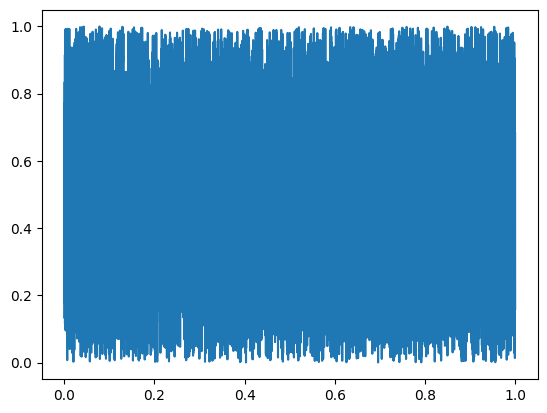

In [148]:
plt.plot(np.linspace(0, 1, len(p_values)), p_values)

<Axes: ylabel='Count'>

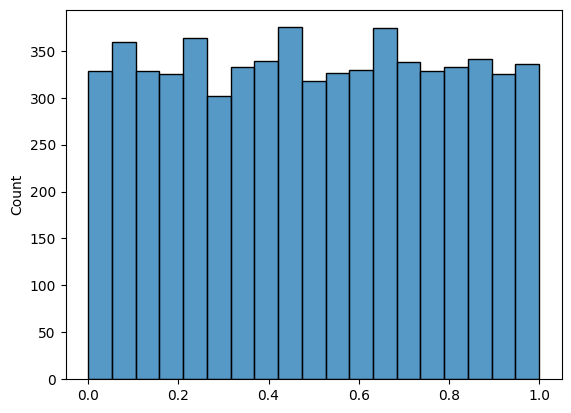

In [149]:
sns.histplot(p_values)

In [37]:
p_values = np.array(p_values)
statystyki = np.array(statystyki)

In [38]:
np.sum(p_values < 0.05)

np.int64(309)

In [41]:
np.sum(p_values < 1e-3), np.sum(p_values < 1e-2)

(np.int64(5), np.int64(57))

In [40]:
np.argwhere(p_values < 1e-3)

array([[2580],
       [4006],
       [4455],
       [5068],
       [6119]])

<Axes: xlabel='2580', ylabel='Count'>

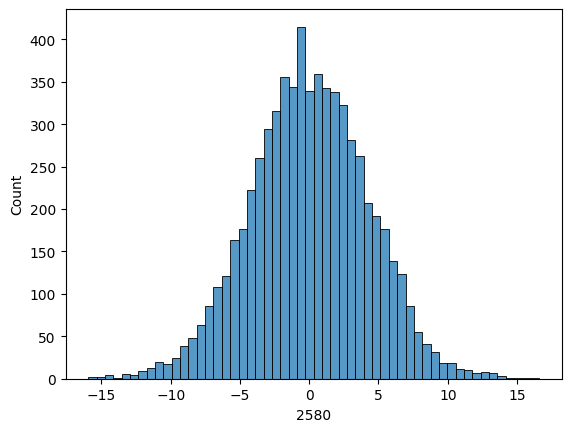

In [42]:
sns.histplot(df["2580"])

In [60]:
labels = np.array([str(i) for i in range(6402)])

In [62]:
 np.sum(p_values < 5e-2)

np.int64(309)

In [63]:
interesting = labels[p_values < 5e-2]

In [64]:
import scikit_posthocs as sp

# Dunn's test z korektą p-value
posthoc = sp.posthoc_dunn(df, val_col='2580', group_col='label', p_adjust='bonferroni')

<Axes: >

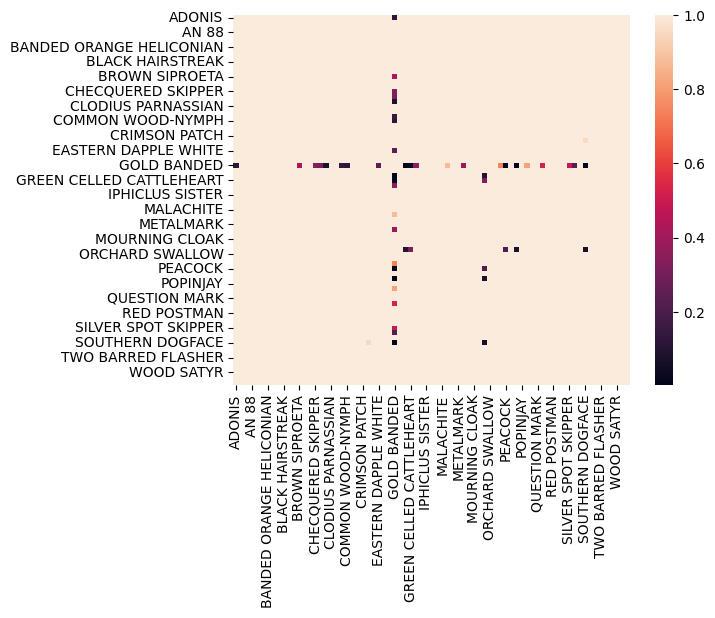

In [65]:
sns.heatmap(posthoc)

In [66]:
np.min(posthoc)

np.float64(0.0032434300862115347)

In [68]:
interesting.shape

(309,)

In [70]:
matrices = []
counter = 0

for colname in interesting:
    counter += 1
    if counter % 30 == 0:
        print(f"{counter//30}/10")
    posthoc = sp.posthoc_dunn(df, val_col=colname, group_col='label', p_adjust='bonferroni')
    matrices.append(posthoc)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


In [76]:
min_scores = np.array([np.min(matrix) for matrix in matrices])

In [78]:
np.sum(min_scores < 0.05)

np.int64(54)

In [79]:
good_matrices = [matrix for matrix in matrices if np.min(matrix) < 5e-2]

In [80]:
len(good_matrices)

54

In [102]:
plt.figure(figsize=(2*15, 15 * len(good_matrices) // 2))
for i in range(len(good_matrices)):
    plt.subplot(len(good_matrices)//2, 2, i + 1)
    sns.heatmap(good_matrices[i])

In [100]:
min_scores = np.array([np.min(matrix) for matrix in matrices])

In [101]:
interesting[min_scores < 5e-2]

array(['233', '290', '441', '457', '506', '809', '1227', '1320', '1457',
       '1487', '1632', '1718', '1780', '1918', '1998', '2061', '2126',
       '2211', '2438', '2503', '2507', '2580', '2694', '2923', '3081',
       '3107', '3230', '3413', '3498', '3556', '3791', '3816', '3866',
       '4044', '4046', '4255', '4757', '4806', '5039', '5068', '5137',
       '5162', '5306', '5350', '5440', '5642', '5670', '5808', '5815',
       '5984', '6131', '6187', '6281', '6334'], dtype='<U4')

In [54]:
from scipy.stats import levene

grupy = [group['2580'].values for name, group in df.groupby('label')]
stat, p = levene(*grupy)

print(f"Test Levene'a (jednorodność wariancji): stat = {stat:.4f}, p-value = {p:.4e}")

Test Levene'a (jednorodność wariancji): stat = 1.0582, p-value = 3.4492e-01


In [89]:
p_values2 = []
statystyki2 = []
counter = 0
for colname in interesting:
    counter += 1
    if counter % 30 == 0:
        print(f"{counter//30}/10")
    grupy = [group[colname].values for name, group in df.groupby('label')]
    stat, p = levene(*grupy)
    p_values2.append(p)
    statystyki2.append(stat)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


In [90]:
p_values2 = np.array(p_values2)

In [91]:
p_values2.shape

(309,)

In [92]:
np.sum(p_values2 < 5e-2)

np.int64(13)

In [93]:
interesting[p_values2 < 5e-2]

array(['130', '1060', '1234', '1780', '1900', '2283', '2525', '4507',
       '4519', '4542', '5162', '6131', '6282'], dtype='<U4')

In [150]:
final = np.concat([new_features.ravel(), np.array(['233', '290', '441', '457', '506', '809', '1227', '1320', '1457',
       '1487', '1632', '1718', '1780', '1918', '1998', '2061', '2126',
       '2211', '2438', '2503', '2507', '2580', '2694', '2923', '3081',
       '3107', '3230', '3413', '3498', '3556', '3791', '3816', '3866',
       '4044', '4046', '4255', '4757', '4806', '5039', '5068', '5137',
       '5162', '5306', '5350', '5440', '5642', '5670', '5808', '5815',
       '5984', '6131', '6187', '6281', '6334']), np.array(['130', '1060', '1234', '1780', '1900', '2283', '2525', '4507',
       '4519', '4542', '5162', '6131', '6282'])])

In [151]:
final = np.unique(final)

In [152]:
final.shape

(149,)

In [153]:
final

array(['1017', '1057', '1060', '1072', '1142', '1227', '1234', '1289',
       '1296', '130', '1311', '1320', '1457', '1465', '1487', '1566',
       '1632', '1718', '1731', '1757', '1773', '1780', '1900', '1918',
       '1998', '2061', '2064', '2104', '2126', '2134', '2211', '2283',
       '2316', '233', '2438', '245', '2474', '2495', '2503', '2507',
       '2509', '2525', '2580', '2671', '2676', '2694', '2773', '2871',
       '2889', '290', '2923', '2926', '3034', '304', '3081', '3094',
       '3103', '3107', '3178', '3230', '3260', '3323', '3346', '3413',
       '3498', '3524', '3556', '3583', '3610', '3614', '363', '3661',
       '3663', '3675', '3791', '3816', '3819', '3840', '3866', '3946',
       '4005', '4006', '4017', '4044', '4046', '4152', '4171', '42',
       '4245', '4255', '4273', '441', '4455', '446', '4507', '4519',
       '4542', '457', '4630', '4643', '4674', '4676', '4687', '4757',
       '4806', '4852', '4989', '5039', '506', '5068', '5074', '5137',
       '5162', '52

In [154]:
df.head()

filename             label          0          1           2  \
0        Image_1.jpg  SOUTHERN DOGFACE -29.304474 -53.646305  157.319061   
9       Image_10.jpg       RED POSTMAN -49.787117  -6.947318  -61.055489   
99     Image_100.jpg       COPPER TAIL   4.422180 -65.743172  -39.040085   
999   Image_1000.jpg     SLEEPY ORANGE  -9.456446 -39.014919  -66.808388   
1000  Image_1001.jpg       RED CRACKER -71.184464  16.106976   35.527672   

              3           4           5          6          7  ...      6392  \
0    -37.507381   -8.112730   -9.215195 -18.801731  -7.313122  ... -1.012158   
9     85.343971  -98.185982   56.400547   8.762672 -29.877161  ...  0.207130   
99   -87.299271  -15.667914 -101.386497  -3.981622   2.684586  ...  0.899929   
999   13.989419  -41.366810   11.329652 -12.163891  33.498779  ...  0.524224   
1000 -17.097151 -114.557312    9.380987 -20.555744 -63.080402  ...  1.477418   

          6393      6394      6395      6396      6397      6398      6399  \
0     0.148856 -0.474834 -0.686265 -0.907431 -0.106018  0.352176  0.885579   
9    -0.961733  0.042471 -0.718197  0.103406  0.056109  0.954526 -0.996989   
99    0.801266  2.644172  0.993100  0.997525 -0.833056 -0.200678  0.222260   
999  -0.214964  0.042924 -0.333499 -0.296275  0.002435 -0.989152  0.002795   
1000  0.875947 -0.157780  0.151067 -1.221653  2.735740 -2.155042  0.139612   

          6400      6401  
0    -0.422445 -0.785773  
9     0.055863  0.447328  
99   -2.177689  0.535028  
999   0.197170 -1.318980  
1000 -2.017737  0.453237  

[5 rows x 6404 columns]

In [155]:
df_ = df.loc[:, list(final) + ["label", "filename"]]

In [156]:
df_.to_csv("exctracted_features.csv")

In [157]:
df_ = df_.iloc[:, :-2]

In [158]:
df_

1017      1057       1060      1072      1142       1227      1234  \
0      7.596840  1.260859  -2.661337 -7.354671  1.222998   8.113509 -3.084675   
9      3.342017 -4.338551  -1.876028  9.541497  9.893789  -2.794660 -1.159124   
99   -19.093079  2.372962   3.960461  6.104719  0.326015   2.178823 -4.880010   
999   10.498298  4.020792  -8.901709 -0.045303  1.086519  -6.838610  6.537136   
1000  -5.942987 -4.794606   5.179518  2.205683 -1.680931  -1.073471 -2.063691   
...         ...       ...        ...       ...       ...        ...       ...   
994   -1.612508 -0.040296  -1.070320 -0.278279 -5.269649  -1.670388 -1.945658   
995   -1.073886 -1.972005  -1.169031  0.729126 -7.316360  10.865200  6.481666   
996   -0.671466 -0.440314   9.701735  6.267940 -1.162076   5.030749 -7.896224   
997    3.033118  3.305619  10.359911 -1.072022 -6.882421 -12.077557  6.380772   
998   -4.308791  0.842795  -5.638838 -5.817172  1.030607   2.945122  6.577097   

           1289       1296        130  ...      6282      6334      6397  \
0     -9.264141  -2.320446   2.129072  ... -0.019626 -1.298234 -0.106018   
9      6.610377   6.439281  16.249882  ...  0.053267 -0.727551  0.056109   
99     0.502012   1.085133 -27.889650  ... -0.175081  0.748328 -0.833056   
999   16.772696  -7.047324 -27.074322  ...  0.745080 -0.465685  0.002435   
1000  -1.048831   3.034322   1.753770  ... -5.788062 -3.070537  2.735740   
...         ...        ...        ...  ...       ...       ...       ...   
994   -0.781249   0.902735   3.935931  ...  3.300385  2.044055 -1.914825   
995   -6.763427   8.392446  -1.775873  ...  0.345356 -0.616964  0.108520   
996    5.115362  -3.900083   9.664847  ...  1.233895  0.853642  0.988297   
997    2.687158  13.144311  24.960291  ...  1.332536  0.357552  1.046495   
998    1.172547  -1.905066  12.107160  ...  0.945469 -0.592792 -0.963791   

            645        706        716        809        851        916  \
0      1.485386  -3.574178  -2.148077  -7.703506  -3.626086  -9.860100   
9      3.416929  -2.565523   0.108830   4.978515   4.474832  12.541668   
99    11.383557   3.568245  11.023996  -7.512587  -7.007218 -10.410913   
999    8.284797  15.961159   0.285843 -16.601744  11.426028   4.654343   
1000  -3.427727   0.850464  -8.847474  -7.627993  -6.294594  -4.557978   
...         ...        ...        ...        ...        ...        ...   
994   -0.536089   1.729416  -1.196694   3.222689  -4.229746   4.296124   
995   -6.699876 -15.414085 -10.533459  -7.913027   9.810059   2.128134   
996   -1.928896  -0.358059   3.413227   1.095906   4.548944  -6.382249   
997   -2.386312  -2.972064  -0.871153  -7.579662   3.959900 -10.690789   
998   -0.261376  14.181027   1.503108   4.645369   2.604248  -1.530617   

            975  
0     -0.052879  
9      4.487264  
99    -4.000995  
999  -11.825953  
1000  -0.866165  
...         ...  
994  -15.853185  
995   10.639388  
996    2.816267  
997    3.149882  
998    5.224612  

[6499 rows x 149 columns]

<Axes: >

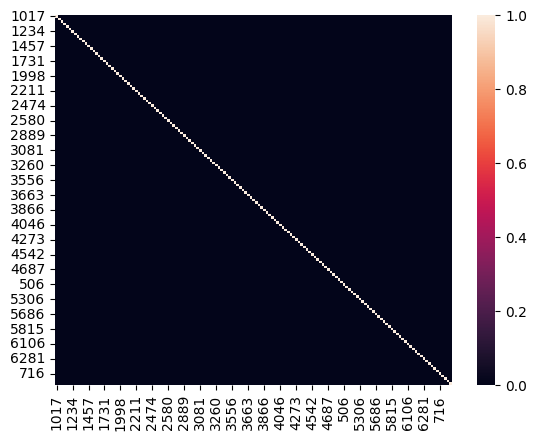

In [159]:
sns.heatmap(df_.corr())